In [1]:
import numpy as np
import pandas as pd



import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
!pip install catboost import catBoostClassifier


[notice] A new release of pip available: 22.1.2 -> 22.2
[notice] To update, run: python.exe -m pip install --upgrade pip


ERROR: Could not find a version that satisfies the requirement import (from versions: none)
ERROR: No matching distribution found for import


In [3]:
# Import useful libraries

import time
import re
import string
from numpy import mean
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest, f_classif

import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV,StratifiedKFold, KFold, GridSearchCV

from sklearn.metrics import f1_score, roc_auc_score, confusion_matrix, precision_recall_curve, auc, roc_curve, recall_score, classification_report 
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, RobustScaler
from sklearn.utils.multiclass import type_of_target


# from catboost import CatBoostClassifier

# # from xgboost import XGBClassifier
# # from lightgbm import LGBMClassifier

from collections import Counter
# from imblearn.over_sampling import RandomOverSampler
# from imblearn.under_sampling import RandomUnderSampler

import warnings
warnings.filterwarnings('ignore')


In [4]:
# Read dataset

train_data = pd.read_csv("./train (1).csv")
#          names=["id","Gender","Age","Driving_License","Region_Code","Previously_Insured","Vehicle_Age","Vehicle_Damage","Annual_Premium","	policy_sales_channel","Vintage","Response"])
test_data = pd.read_csv("./test.csv")
#         names=["id","Gender","Age","Driving_License","Region_Code","Previously_Insured","Vehicle_Age","Vehicle_Damage","Annual_Premium","Policy_Sales_Channel","Vintage"])
train_data.columns = train_data.columns.str.lower().str.strip().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
test_data.columns = test_data.columns.str.lower().str.strip().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

In [5]:
 train_data

,id,gender,age,driving_license,region_code,previously_insured,vehicle_age,vehicle_damage,annual_premium,policy_sales_channel,vintage,response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0


In [6]:
 test_data

,id,gender,age,driving_license,region_code,previously_insured,vehicle_age,vehicle_damage,annual_premium,policy_sales_channel,vintage
0,381110,Male,25,1,11.0,1,< 1 Year,No,35786.0,152.0,53
1,381111,Male,40,1,28.0,0,1-2 Year,Yes,33762.0,7.0,111
2,381112,Male,47,1,28.0,0,1-2 Year,Yes,40050.0,124.0,199
3,381113,Male,24,1,27.0,1,< 1 Year,Yes,37356.0,152.0,187
4,381114,Male,27,1,28.0,1,< 1 Year,No,59097.0,152.0,297
...,...,...,...,...,...,...,...,...,...,...,...
127032,508142,Female,26,1,37.0,1,< 1 Year,No,30867.0,152.0,56
127033,508143,Female,38,1,28.0,0,1-2 Year,Yes,28700.0,122.0,165
127034,508144,Male,21,1,46.0,1,< 1 Year,No,29802.0,152.0,74
127035,508145,Male,71,1,28.0,1,1-2 Year,No,62875.0,26.0,265


In [7]:
print('Train Data Shape: ', train_data.shape)
print('Test Data Shape: ', test_data.shape)
train_data.head()


Train Data Shape:  (381109, 12)
Test Data Shape:  (127037, 11)


,id,gender,age,driving_license,region_code,previously_insured,vehicle_age,vehicle_damage,annual_premium,policy_sales_channel,vintage,response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [8]:
train_data.isnull().sum()

id                      0
gender                  0
age                     0
driving_license         0
region_code             0
previously_insured      0
vehicle_age             0
vehicle_damage          0
annual_premium          0
policy_sales_channel    0
vintage                 0
response                0
dtype: int64

Exploratory Data Analysis

In [9]:
train_data['response'].value_counts()

0    334399
1     46710
Name: response, dtype: int64

In [10]:
train_data.nunique()

id                      381109
gender                       2
age                         66
driving_license              2
region_code                 53
previously_insured           2
vehicle_age                  3
vehicle_damage               2
annual_premium           48838
policy_sales_channel       155
vintage                    290
response                     2
dtype: int64

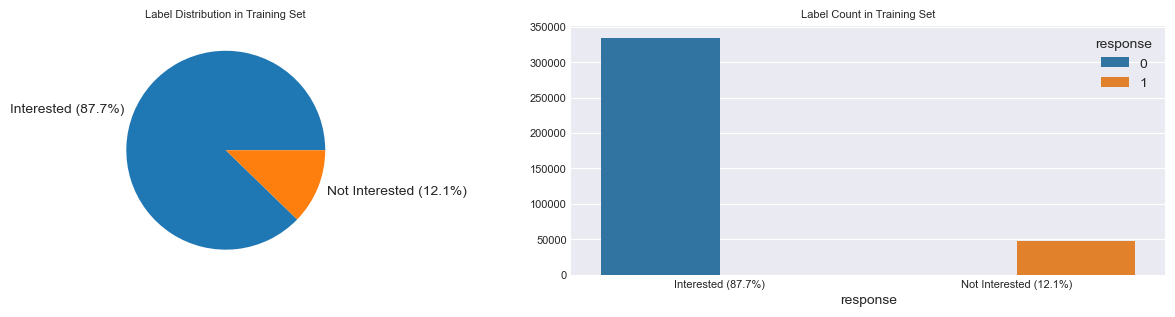

In [11]:
fig, axes = plt.subplots(ncols = 2, figsize = (13, 3), dpi = 100)
plt.tight_layout()

train_data.groupby('response').count()['id'].plot(kind = 'pie', ax
= axes[0], labels = ['Interested (87.7%)', 'Not Interested (12.1%)'])

sns.countplot(x = train_data['response'], hue = train_data['response'],
ax = axes[1])

axes[0].set_ylabel('')
axes[1].set_ylabel('')
axes[1].set_xticklabels(['Interested (87.7%)', 'Not Interested (12.1%)'])
axes[0].tick_params(axis = 'x', labelsize = 8)

axes[0].tick_params(axis = 'y', labelsize = 8)

axes[1].tick_params(axis = 'x', labelsize = 8)

axes[1].tick_params(axis = 'y', labelsize = 8)

axes[0].set_title('Label Distribution in Training Set', fontsize = 8)
axes[1].set_title('Label Count in Training Set', fontsize =8)

plt.show()

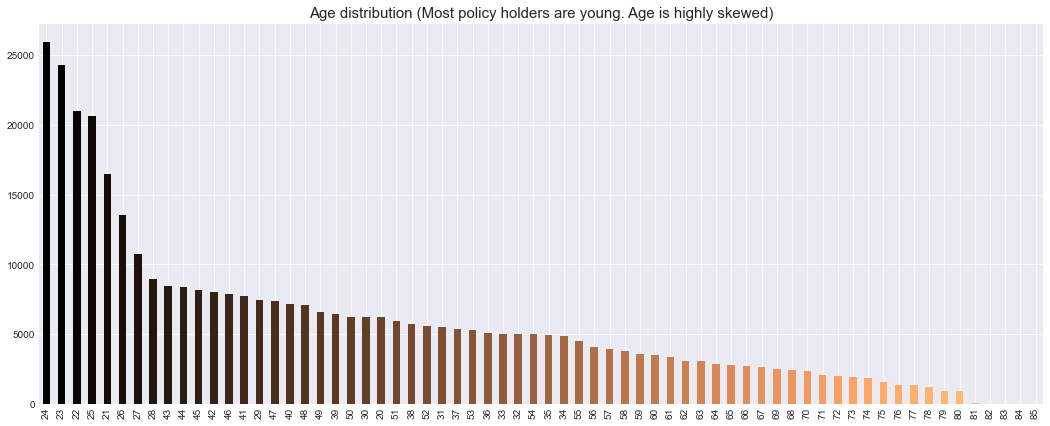

In [12]:
# looking at the frequency of records by age

plt.rcParams['figure.figsize'] = (18, 7)
color = plt.cm.copper(np.linspace(0, 1, 66))
train_data['age'].value_counts().head(66).plot.bar(color = color)
plt.title('Age distribution (Most policy holders are young. Age is highly skewed)', fontsize = 15)
plt.xticks(rotation = 90)
plt.show()

Combine Training and Test Data for additional visualization

In [13]:
train_data['type'] = 'train'
test_data['type'] = 'test'

master_data = pd.concat([train_data, test_data])

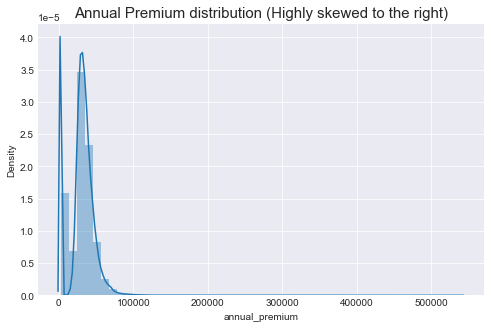

In [14]:
plt.figure(figsize = (8, 5))
sns.distplot(master_data['annual_premium'])
plt.title('Annual Premium distribution (Highly skewed to the right)', fontsize = 15)
plt.show()

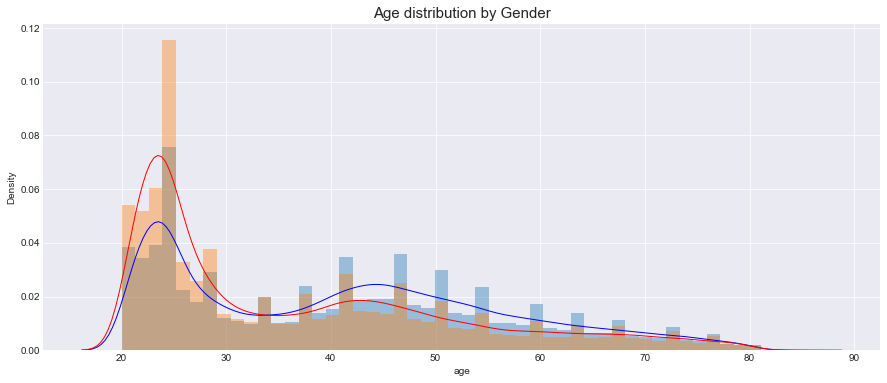

In [15]:

plt.figure(figsize = (15, 6))
sns.distplot(master_data.loc[(master_data['gender'] == 'Male'), 'age'], kde_kws = {"color": "b", "lw": 1, "label": "Male"})
sns.distplot(master_data.loc[(master_data['gender'] == 'Female'), 'age'], kde_kws = {"color": "r", "lw": 1, "label": "Female"})
plt.title('Age distribution by Gender', fontsize = 15)
plt.show()


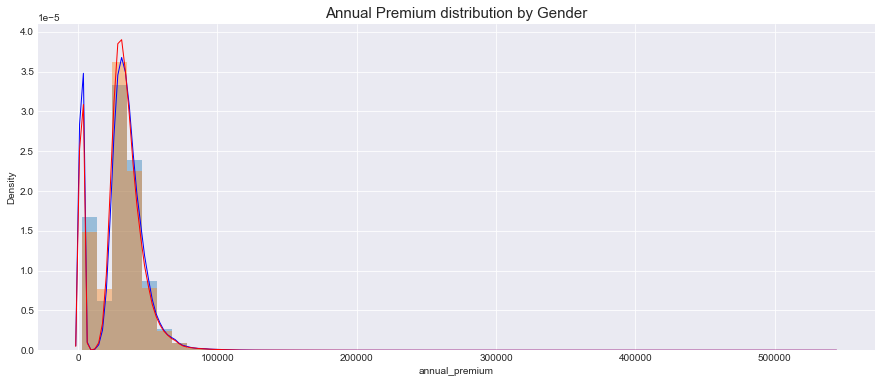

In [16]:
plt.figure(figsize = (15, 6))
sns.distplot(master_data.loc[(master_data['gender'] == 'Male'), 'annual_premium'], kde_kws = {"color": "b", "lw": 1, "label": "Male"})
sns.distplot(master_data.loc[(master_data['gender'] == 'Female'), 'annual_premium'], kde_kws = {"color": "r", "lw": 1, "label": "Female"})
plt.title('Annual Premium distribution by Gender', fontsize = 15)
plt.show()

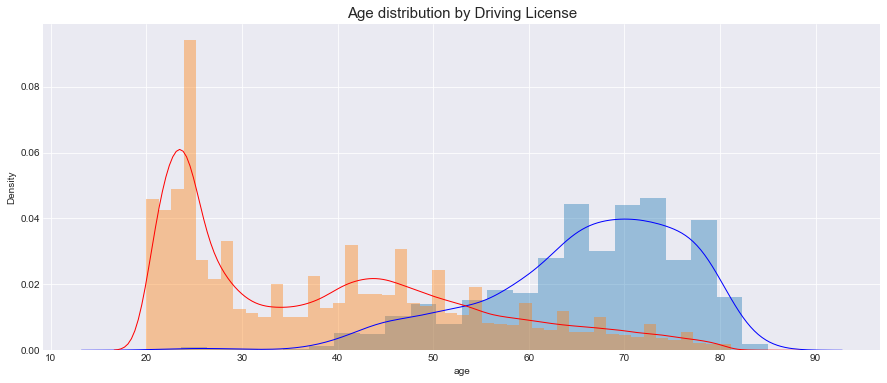

In [17]:
plt.figure(figsize = (15, 6))
sns.distplot(master_data.loc[(master_data['driving_license'] == 0), 'age'], kde_kws = {"color": "b", "lw": 1, "label": "Not Licensed for driving"})
sns.distplot(master_data.loc[(master_data['driving_license'] == 1), 'age'], kde_kws = {"color": "r", "lw": 1, "label": "Licensed for Driving"})
plt.title('Age distribution by Driving License', fontsize = 15)
plt.show()

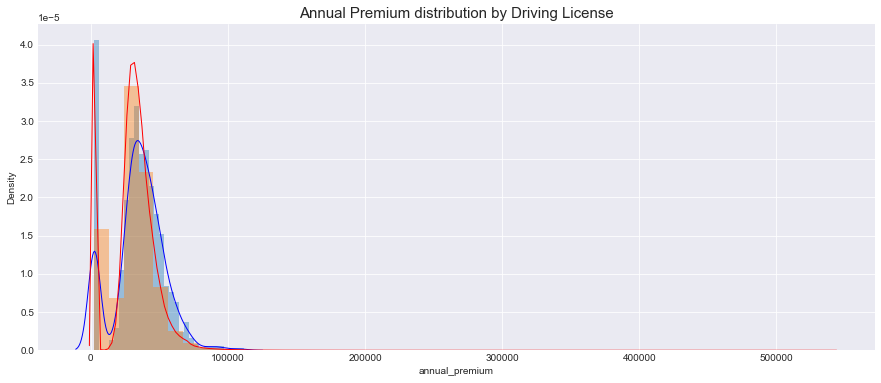

In [18]:
plt.figure(figsize = (15, 6))
sns.distplot(master_data.loc[(master_data['driving_license'] == 0), 'annual_premium'], kde_kws = {"color": "b", "lw": 1, "label": "Not Licensed for driving"})
sns.distplot(master_data.loc[(master_data['driving_license'] == 1), 'annual_premium'], kde_kws = {"color": "r", "lw": 1, "label": "Licensed for Driving"})
plt.title('Annual Premium distribution by Driving License', fontsize = 15)
plt.show()

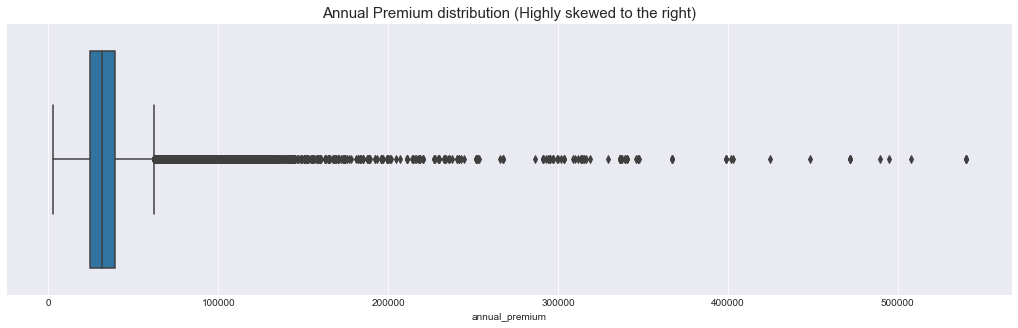

In [19]:
plt.figure(figsize = (18, 5))
sns.boxplot(master_data['annual_premium'])
plt.title('Annual Premium distribution (Highly skewed to the right)', fontsize = 15)
plt.show()

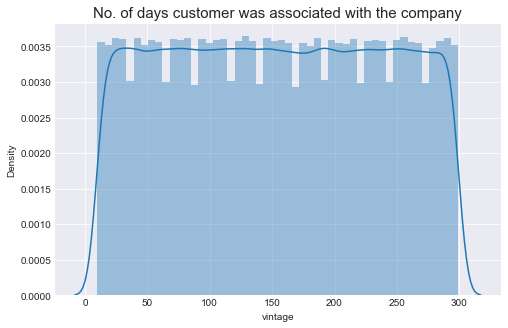

In [20]:
plt.figure(figsize = (8, 5))
sns.distplot(master_data['vintage'])
plt.title('No. of days customer was associated with the company', fontsize = 15)
plt.show()

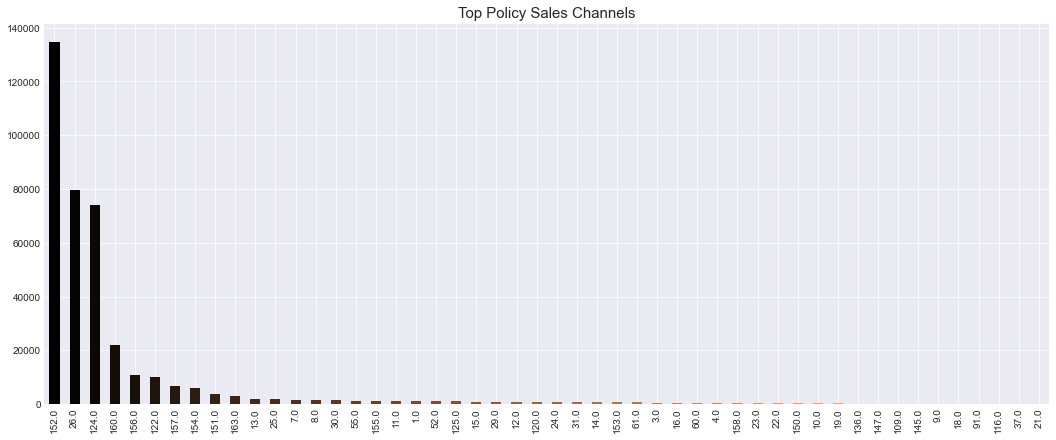

In [21]:
# looking at the frequency of records by age

plt.rcParams['figure.figsize'] = (18, 7)
color = plt.cm.copper(np.linspace(0, 1, 50))
train_data['policy_sales_channel'].value_counts().head(50).plot.bar(color = color)
plt.title('Top Policy Sales Channels', fontsize = 15)
plt.xticks(rotation = 90)
plt.show()

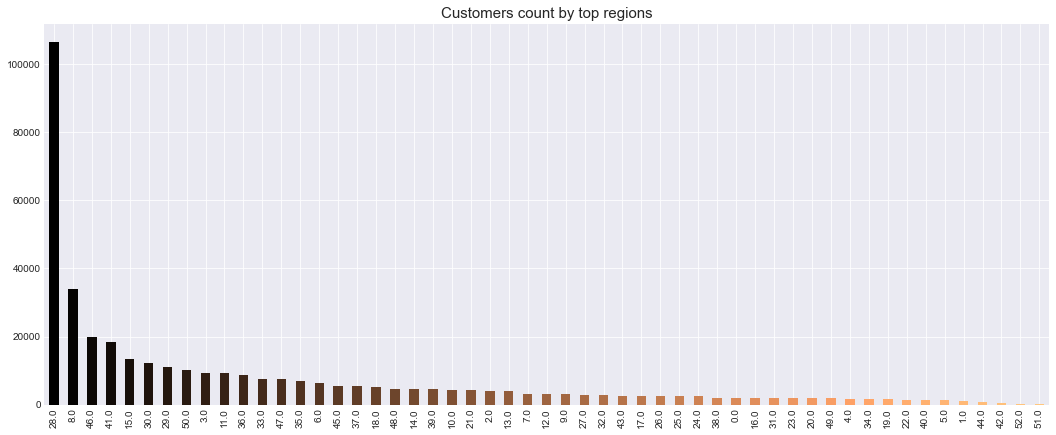

In [22]:
# looking at the frequency of records by sales channel

plt.rcParams['figure.figsize'] = (18, 7)
color = plt.cm.copper(np.linspace(0, 1, 53))
train_data['region_code'].value_counts().head(53).plot.bar(color = color)
plt.title('Customers count by top regions', fontsize = 15)
plt.xticks(rotation = 90)
plt.show()

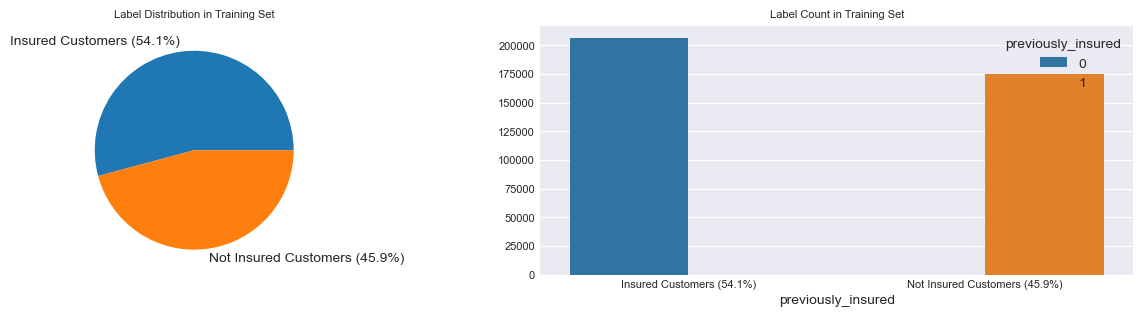

In [23]:
fig, axes = plt.subplots(ncols = 2, figsize = (13, 3), dpi = 100)
plt.tight_layout()

train_data.groupby('previously_insured').count()['id'].plot(kind = 'pie', ax = axes[0], labels = ['Insured Customers (54.1%)', 'Not Insured Customers (45.9%)'])
sns.countplot(x = train_data['previously_insured'], hue = train_data['previously_insured'], ax = axes[1])

axes[0].set_ylabel('')
axes[1].set_ylabel('')
axes[1].set_xticklabels(['Insured Customers (54.1%)', 'Not Insured Customers (45.9%)'])
axes[0].tick_params(axis = 'x', labelsize = 8)
axes[0].tick_params(axis = 'y', labelsize = 8)
axes[1].tick_params(axis = 'x', labelsize = 8)
axes[1].tick_params(axis = 'y', labelsize = 8)

axes[0].set_title('Label Distribution in Training Set', fontsize = 8)
axes[1].set_title('Label Count in Training Set', fontsize =8)

plt.show()

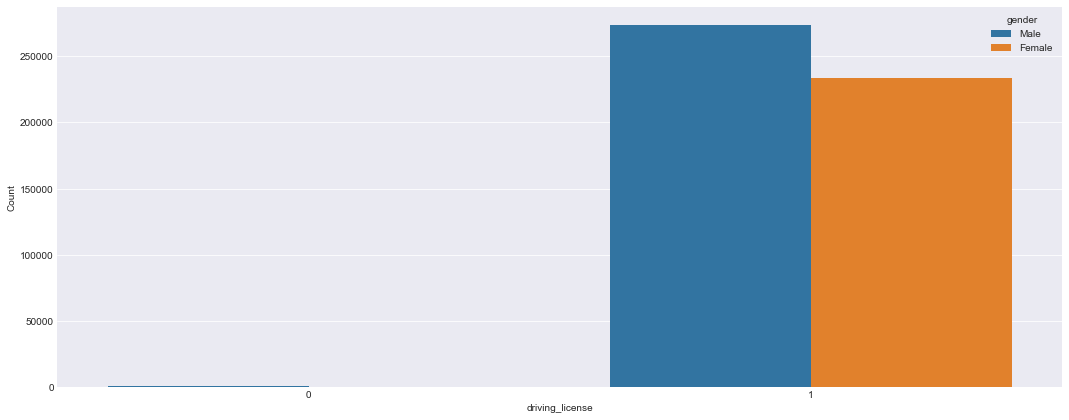

In [24]:
sns.countplot(data = master_data, x = 'driving_license', hue = 'gender')
plt.ylabel('Count')
plt.show()

Feature Engineering

In [25]:
# Unique values for all the columns
for col in train_data.columns[~(train_data.columns.isin(['age', 'id', 'region_code', 'annual_premium', 'policy_sales_channel', 'vintage']))].tolist():
    print(" Unique Values --> " + col, ':', len(train_data[col].unique()), ': ', train_data[col].unique())

 Unique Values --> gender : 2 :  ['Male' 'Female']
 Unique Values --> driving_license : 2 :  [1 0]
 Unique Values --> previously_insured : 2 :  [0 1]
 Unique Values --> vehicle_age : 3 :  ['> 2 Years' '1-2 Year' '< 1 Year']
 Unique Values --> vehicle_damage : 2 :  ['Yes' 'No']
 Unique Values --> response : 2 :  [1 0]
 Unique Values --> type : 1 :  ['train']


In [26]:
gender = {'Male': 0, 'Female': 1}
driving_license = {0: 0, 1: 1}
previously_insured = {0: 1, 1: 0}
vehicle_age = {'> 2 Years': 2, '1-2 Year': 1, '< 1 Year': 0}
vehicle_damage = {'Yes': 1, 'No': 0}

master_data['gender'] = master_data['gender'].map(gender)
master_data['driving_license'] = master_data['driving_license'].map(driving_license)
master_data['previously_insured'] = master_data['previously_insured'].map(previously_insured)
master_data['vehicle_age'] = master_data['vehicle_age'].map(vehicle_age)
master_data['vehicle_damage'] = master_data['vehicle_damage'].map(vehicle_damage)

master_data['policy_sales_channel'] = master_data['policy_sales_channel'].apply(lambda x: np.int(x))
master_data['region_code'] = master_data['region_code'].apply(lambda x: np.int(x))

master_data.head()

,id,gender,age,driving_license,region_code,previously_insured,vehicle_age,vehicle_damage,annual_premium,policy_sales_channel,vintage,response,type
0,1,0,44,1,28,1,2,1,40454.0,26,217,1.0,train
1,2,0,76,1,3,1,1,0,33536.0,26,183,0.0,train
2,3,0,47,1,28,1,2,1,38294.0,26,27,1.0,train
3,4,0,21,1,11,0,0,0,28619.0,152,203,0.0,train
4,5,1,29,1,41,0,0,0,27496.0,152,39,0.0,train


Correlation of feature with target variablr

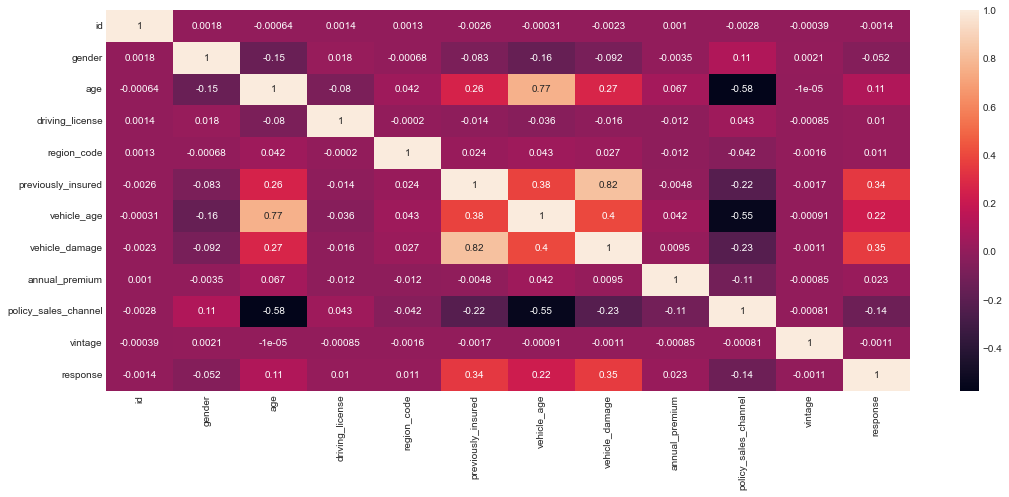

In [27]:
corrMatrix = master_data.corr()
sns.heatmap(corrMatrix, annot = True)
plt.show()

It appears policy sales channel and vintage are more negatively correlated to the target variable response

In [28]:
# Numerical columns
numerical_cols = ['age', 'vintage']

# categorical column 
cat_col = ['gender', 'driving_license', 'region_code', 'previously_insured', 'vehicle_age', 'vehicle_damage', 'policy_sales_channel']

#master_data['policy_sales_channel'] = master_data['policy_sales_channel'].map(master_data['policy_sales_channel'].value_counts())
#master_data['region_code'] = master_data['region_code'].map(master_data['region_code'].value_counts())

ss = StandardScaler()
master_data[numerical_cols] = ss.fit_transform(master_data[numerical_cols])

mm = MinMaxScaler()
master_data[['annual_premium']] = mm.fit_transform(master_data[['annual_premium']])

master_data.head()

,id,gender,age,driving_license,region_code,previously_insured,vehicle_age,vehicle_damage,annual_premium,policy_sales_channel,vintage,response,type
0,1,0,0.334938,1,28,1,2,1,0.070366,26,0.748905,1.0,train
1,2,0,2.399432,1,3,1,1,0,0.057496,26,0.342540,0.0,train
2,3,0,0.528484,1,28,1,2,1,0.066347,26,-1.521956,1.0,train
3,4,0,-1.148918,1,11,0,0,0,0.048348,152,0.581578,0.0,train
4,5,1,-0.632794,1,41,0,0,0,0.046259,152,-1.378534,0.0,train


Splitting bact to train/test set

In [29]:
train_data = master_data.loc[(master_data['type'] == 'train')]
test_data = master_data.loc[(master_data['type'] == 'test')]

train_data = train_data.drop(['id', 'type'], axis = 1)
train_data['response'] = train_data['response'].apply(lambda x: np.int(x))

testIDs = test_data['id']
test_data = test_data.drop(['id', 'type', 'response'], axis = 1)
train_data.head()

,gender,age,driving_license,region_code,previously_insured,vehicle_age,vehicle_damage,annual_premium,policy_sales_channel,vintage,response
0,0,0.334938,1,28,1,2,1,0.070366,26,0.748905,1
1,0,2.399432,1,3,1,1,0,0.057496,26,0.342540,0
2,0,0.528484,1,28,1,2,1,0.066347,26,-1.521956,1
3,0,-1.148918,1,11,0,0,0,0.048348,152,0.581578,0
4,1,-0.632794,1,41,0,0,0,0.046259,152,-1.378534,0


In [30]:
for column in cat_col:
    test_data[column] = test_data[column].astype('str')

In [ ]:
for column in cat_col:
    train_data[column] = train_data[column].astype('str')

train_data = train_data.drop(['vintage'], axis = 1)
test_data = test_data.drop(['vintage'], axis = 1)

X = train_data.drop(['response'], axis = 1)#.values
y = train_data['response']#.values

cat_cols = [0, 2, 3, 4, 5, 6, 8]

Model building

1.Catboost Model

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_
    size = 0.22, random_state = 22, stratify = y, shuffle = True)

modelC = CatBoostClassifier()
modelC = modelC.fit(X_train, y_train, cat_features = cat_col, 
eval_set = (X_test, y_test), early_stopping_rounds = 10, verbose 
= 100)

predictions = [pred[1] for pred in modelC.predict_proba(X_test)]
print('Validation ROC AUC Score:', roc_auc_score(y_test, predictions,
average = 'weighted'))

In [ ]:
cat_pred = [pred[1] for pred in modelC.predict_proba(test_data)]
submissionC = pd.DataFrame(data = {'id': testIDs, 'Response': cat_pred})
submissionC.to_csv("catboost_v1.csv", index = False)
submissionC.head()